# Demo 05: Algorithms01

## Define Geometry

In [1]:
import tigre
geo=tigre.geometry_default(high_quality=False)

## Load data and generate projections

In [4]:
import numpy as np
from tigre.utilities.Ax import Ax
from tigre.demos.Test_data import data_loader
# define angles
angles=np.linspace(0,2*np.pi,dtype=np.float32)
# load head phantom data
head=data_loader.load_head_phantom(number_of_voxels=geo.nVoxel)
# generate projections
projections=Ax(head,geo,angles,'interpolated')

## Usage of FDK

In [5]:
import tigre.algorithms as algs
print(help(algs.fdk))

Help on function FDK in module tigre.algorithms.single_pass_algorithms:

FDK(proj, geo, angles, **kwargs)
      solves CT image reconstruction.
    
      :param proj: np.array(dtype=float32),
       Data input in the form of 3d
    
      :param geo: tigre.utilities.geometry.Geometry
       Geometry of detector and image (see examples/Demo code)
    
      :param angles: np.array(dtype=float32)
       Angles of projection, shape = (nangles,3) or (nangles,)
    
      :param filter: str
       Type of filter used for backprojection
       opts: "shep_logan"
             "cosine"
             "hamming"
             "hann"
    
      :param verbose: bool
       Feedback print statements for algorithm progress
    
      :param kwargs: dict
       keyword arguments
    
      :return: np.array(dtype=float32)
    
      Usage:
      -------
      >>> import tigre
      >>> import tigre.algorithms as algs
      >>> import numpy
      >>> from tigre.demos.Test_data import data_loader
      >

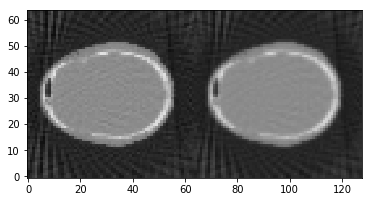

<tigre.utilities.plotimg.plotimg instance at 0x7f740ab0a560>

In [7]:

imgfdk1=algs.FDK(projections,geo,angles,filter='ram_lak')
imgfdk2=algs.FDK(projections,geo,angles,filter='hann')
# The look quite similar:
tigre.plotimg(np.hstack((imgfdk1,imgfdk2)),slice=32,dim='x')

On the other hand it can be seen that one has bigger errors in the whole
image while the other just in the boundaries

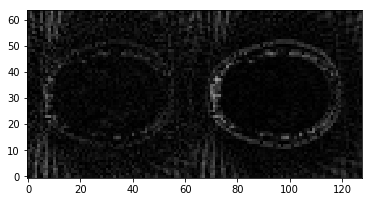

<tigre.utilities.plotimg.plotimg instance at 0x7f7401a845a8>

In [9]:
dif1=abs(head-imgfdk1)
dif2=abs(head-imgfdk2)
tigre.plotimg(np.hstack((dif1,dif2)),slice=32,dim='x')